In [2]:
f=open('output_infernal_assegnazioni.txt').readlines()

In [3]:
for riga in f:
    print riga.split()[1]+"\t"+riga.split()[3]

RF00002	RF00002
RF00003	RF00003
RF00003	RF00003
RF00003	RF00003
RF00003	RF00003
RF00003	RF00003
RF00004	RF00004
RF00004	RF00004
RF00004	RF00004
RF00004	RF00004
RF00004	RF00004
RF00004	RF00004
RF00004	RF00004
RF00004	RF00004
RF00004	RF00004
RF00004	RF00004
RF00004	RF00004
RF00004	RF00004
RF00004	RF00004
RF00005	RF00005
RF00005	RF02194
RF00005	RF00005
RF00005	RF00005
RF00005	RF00005
RF00005	RF00005
RF00005	hits
RF00005	RF00005
RF00005	RF01844
RF00005	RF00005
RF00005	RF00005
RF00005	hits
RF00005	RF00005
RF00005	RF00005
RF00005	RF00005
RF00005	RF00005
RF00006	RF00006
RF00007	RF00007
RF00007	RF00007
RF00007	RF00007
RF00007	RF00007
RF00007	RF00007
RF00007	RF00007
RF00007	RF00007
RF00009	RF00009
RF00009	RF00009
RF00009	RF00772
RF00009	hits
RF00009	hits
RF00009	hits
RF00009	RF02004
RF00009	RF00009
RF00009	RF00009
RF00009	hits
RF00009	hits
RF00009	hits
RF00009	RF00009
RF00009	RF00009
RF00009	RF00009
RF00009	RF00778
RF00009	RF00009
RF00009	RF00009
RF00009	RF00009
RF00009	RF00009
RF00009	RF01689


In [16]:
o=open('coppie_infernal.txt', 'w')
coppie=[[riga.split()[1],riga.split()[3]] for riga in f]
for coppia in coppie:
    o.write(coppia[0]+"\t"+coppia[1]+"\n")
o.close()

In [17]:
famiglie=list(set([x.split()[1] for x in f]))
print len(famiglie)

171


In [67]:
d_fam={}
for fam in famiglie:
    d_fam[fam]={'TP':0, 'FP':0, 'FN':0, 'TN':1133, 'count':0, 'TPR':0, 'FPR':0}
d_fam

for coppia in coppie:
    d_fam[coppia[0]]['count']+=1
    if coppia[0]==coppia[1]:
        d_fam[coppia[0]]['TP']+=1
        d_fam[coppia[0]]['TN']-=1
        
    
    else:
        if coppia[1]=='hits':
            d_fam[coppia[0]]['FN']+=1
            #d_fam[coppia[0]]['TN']-=1
        else:
            d_fam[coppia[0]]['FN']+=1
            d_fam[coppia[1]]['FP']+=1
            d_fam[coppia[0]]['TN']-=1
            d_fam[coppia[1]]['TN']-=1
    d_fam[coppia[0]]  
#d_fam

In [71]:
TPR=[]
FPR=[]
col=[]
for fam in d_fam:
    TPR.append(float(d_fam[fam]['TP'])/(d_fam[fam]['TP']+d_fam[fam]['FN']))
    FPR.append(float(d_fam[fam]['FP'])/(d_fam[fam]['FP']+d_fam[fam]['TN']))
    col.append(d_fam[fam]['count'])
    

In [76]:
import matplotlib.pyplot as plt
import numpy as np

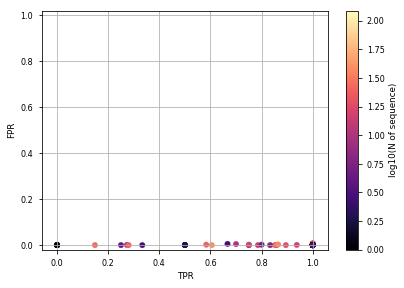

In [79]:
with plt.style.context('seaborn-paper'):
    s=plt.scatter(TPR, FPR, c=np.log10(col), cmap='magma')
    plt.xlabel('TPR')
    plt.ylabel('FPR')
    plt.grid()
    
    plt.ylim([-0.02,1.02])
    #plt.axis([-0.02,1.02, -0.02,1.02])
    
    a=plt.colorbar(s)
    a.set_label("log10(N of sequence)")
    
    plt.savefig('Infernal_TPR_FPR.pdf')
    plt.show()
    plt.close()

In [13]:
c=0
tot=0
under_threshold=0
for line in f:
    #print len(line.split())
    tot+=1
    if line.split()[1]==line.split()[3]:
        c+=1
    if len(line.split())>4 and line.split()[4]=='Thresholds':
        under_threshold+=1
        
print c
print tot
print under_threshold
print float(c)/float(tot)
print float(under_threshold)/float(tot)

988
1133
64
0.872021182701
0.0564872021183
